In [1]:
import numpy as np
import tensorflow as tf

In [2]:
n_features = 10
n_dense_neurons = 3

In [3]:
x = tf.placeholder(tf.float32, (None,n_features))

In [4]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [6]:
xW = tf.matmul(x,W)

In [7]:
z = tf.add(xW, b)

In [8]:
a = tf.sigmoid(z)

In [9]:
init = tf.global_variables_initializer()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

## Simple Regression Model


In [13]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-0.91462883,  1.64430354,  1.19914377,  2.40366567,  3.31992026,
        5.17464294,  7.57507666,  8.60581114,  9.83323773, 11.17901002])

In [14]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

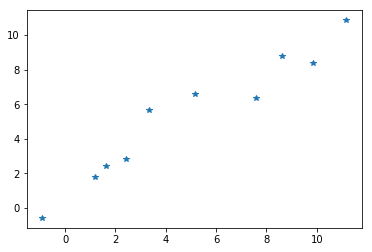

In [20]:
plt.plot(x_data,y_label,'*')

In [21]:
np.random.rand(2)

array([0.34710013, 0.11429993])

In [22]:
m = tf.Variable(0.78)
b = tf.Variable(0.56)

In [23]:
error = 0

In [24]:
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat) ** 2

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])
    

In [34]:
x_test = np.linspace(-1,11,10)
y_pred = final_slope * x_test + final_intercept

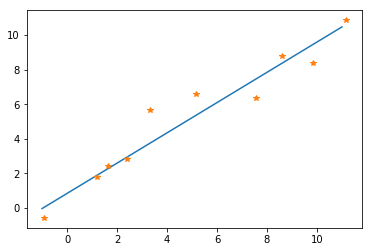

In [35]:
plt.plot(x_test,y_pred)
plt.plot(x_data,y_label,'*')